In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 
import seaborn as sns

In [2]:
data = pd.read_csv('data/bank_churn.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.shape

(10000, 14)

In [5]:
data.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

In [6]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
data.nunique() # counting unique value in each column.

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

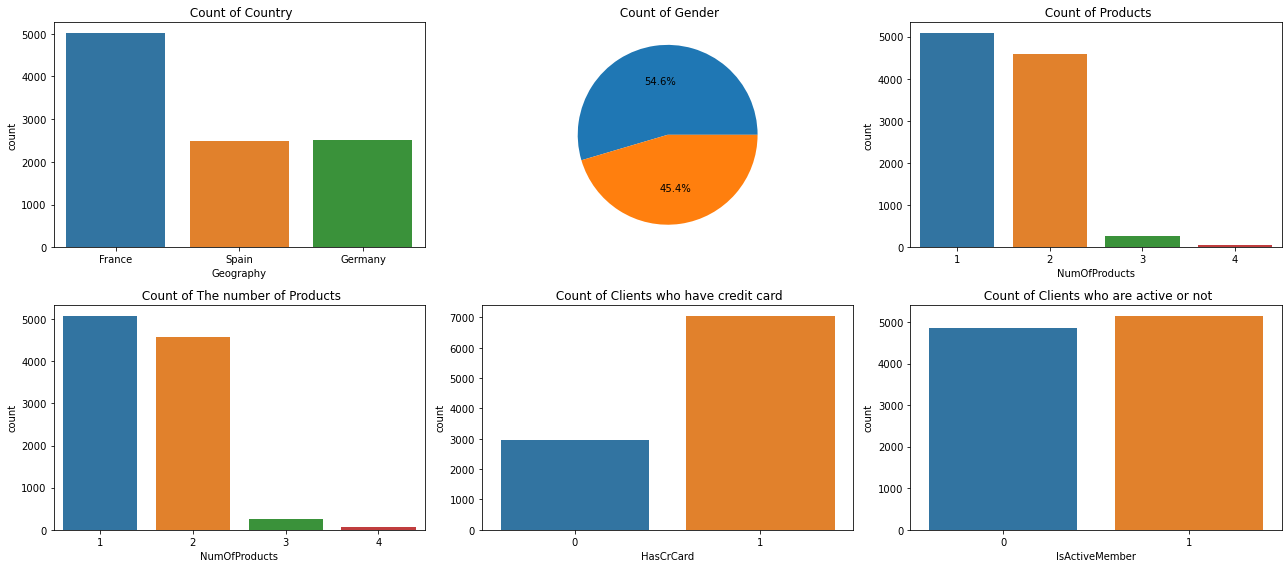

In [8]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(18,8))

sns.countplot(data=data, x='Geography', ax = axes[0,0])
axes[0,0].set_title(' Count of Country')

axes[0, 1].pie(data['Gender'].value_counts(),autopct='%1.1f%%')
axes[0,1].set_title(' Count of Gender')

sns.countplot(data=data, x='NumOfProducts', ax = axes[0,2])
axes[0,2].set_title(' Count of Products')

sns.countplot(x='NumOfProducts', data = data, ax = axes[1,0])
axes[1, 0].set_title(' Count of The number of Products')

sns.countplot(x='HasCrCard', data = data, ax = axes[1,1])
axes[1, 1].set_title(' Count of Clients who have credit card')

sns.countplot(x='IsActiveMember', data = data, ax = axes[1,2])
axes[1, 2].set_title(' Count of Clients who are active or not')

plt.tight_layout()
plt.show()


Histograms of the numerical features:

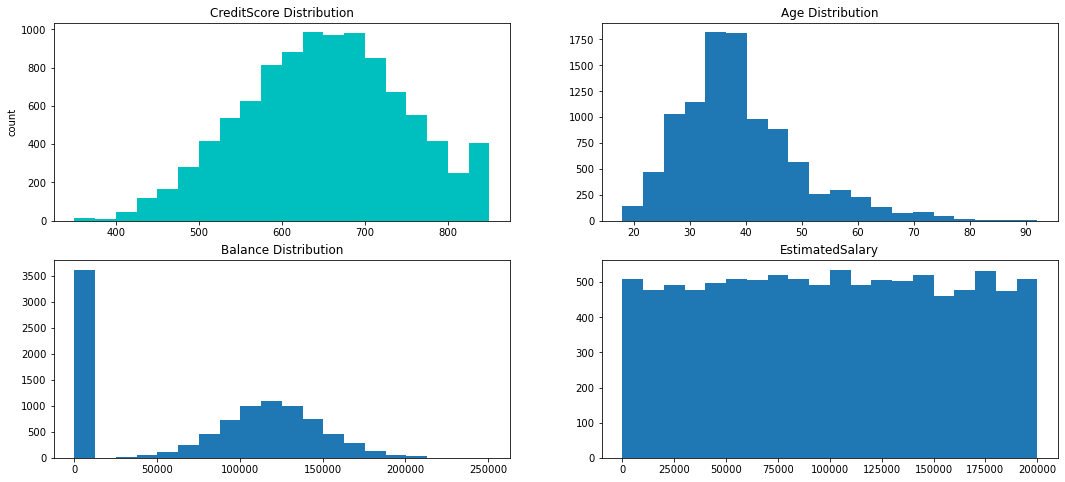

In [9]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(18,8))

axes[0,0].hist(data['CreditScore'],bins = 20,color = 'c')
axes[0,0].set_title("CreditScore Distribution")
axes[0,0].set_ylabel("count")

axes[0,1].hist(data['Age'],bins = 20)
axes[0,1].set_title("Age Distribution")

axes[1,0].hist(data['Balance'],bins = 20)
axes[1,0].set_title("Balance Distribution")

axes[1,1].hist(data['EstimatedSalary'],bins = 20)
axes[1,1].set_title("EstimatedSalary")

plt.show()


Repartition of a feature depending on the target value

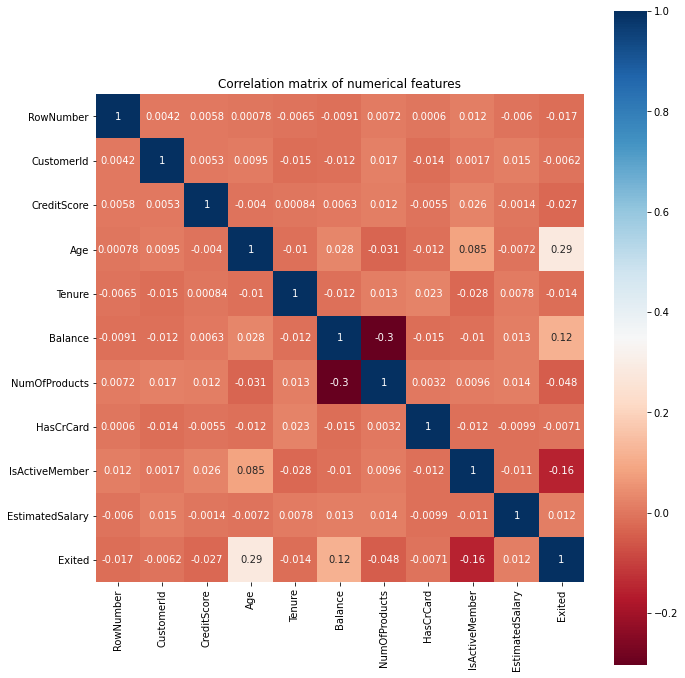

In [10]:
#this one only check for the numerical features
corr=data.corr()
plt.subplots(figsize=(10,10));
sns.heatmap(corr, annot=True, cmap="RdBu", square=True)
plt.title("Correlation matrix of numerical features")
plt.tight_layout()
plt.show()

Existed seems to be somehow correlated with age,balance and EstimatedSalary

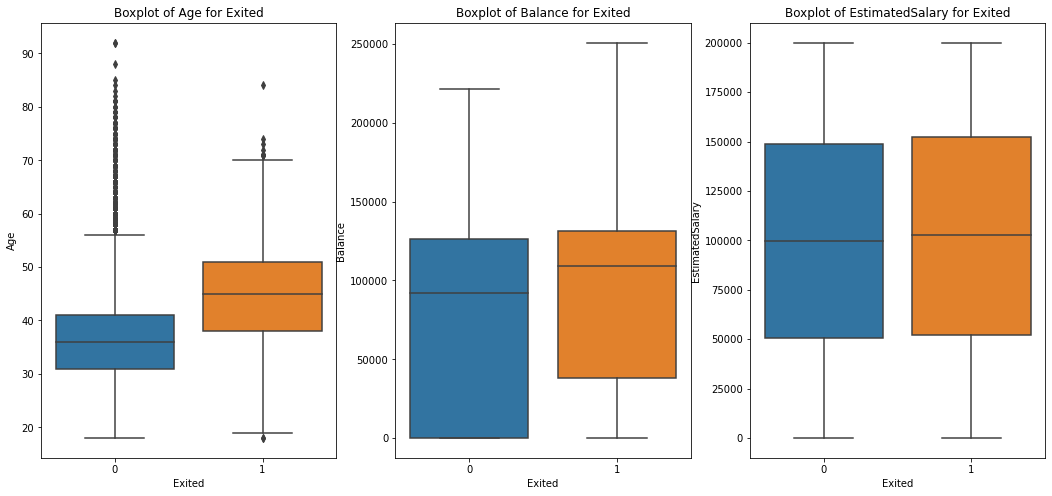

In [11]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(18,8))

sns.boxplot(x = data['Exited'],y = data['Age'],ax = axs[0])
axs[0].set_title('Boxplot of Age for Exited')


sns.boxplot(x = data['Exited'],y = data['Balance'],ax = axs[1])
axs[1].set_title('Boxplot of Balance for Exited')


sns.boxplot(x = data['Exited'],y = data['EstimatedSalary'],ax = axs[2])
axs[2].set_title('Boxplot of EstimatedSalary for Exited')

plt.show()

In [12]:
factor_1= data.groupby(['Exited', 'IsActiveMember']).size().reset_index(name='count')
factor_1

,Exited,IsActiveMember,count
0,0,0,3547
1,0,1,4416
2,1,0,1302
3,1,1,735


<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

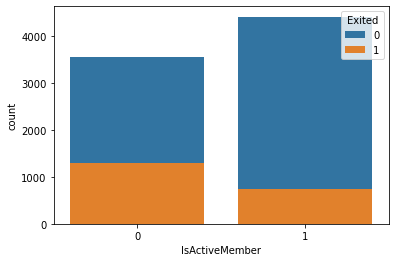

In [13]:
sns.barplot(hue='Exited', y='count', x='IsActiveMember', data=factor_1,dodge=False)

In [14]:
factor_2 = data.groupby(['Geography', 'Exited']).size().reset_index(name='count')


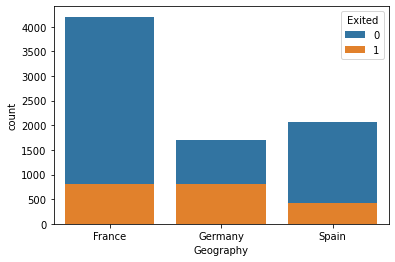

In [15]:
factor_2 = sns.barplot(x = 'Geography', y ='count', hue ='Exited', data = factor_2, dodge=False)

Prepare the data set. Example: dropping unrelevant data, preparing the predictors and the response, data encoding, train/test split, data scaling.


In [16]:
dataset = data.drop(['RowNumber','CustomerId','Surname'],axis =1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [17]:
#Preparing the predictors and the response
X = dataset.drop('Exited',axis = 1)
y = dataset['Exited']

# Data encoding for category features

### Method 1 encoder binary and category in 2 step speparate

In [18]:

X_encorder = X.copy()

In [19]:
from sklearn import preprocessing

 ##### OrdinalEncoder for Binary value (Yes/No, True,False...)

In [20]:
ordinal_encorder =  preprocessing.OrdinalEncoder()
ordinal_encorder.fit(X_encorder[['Gender']])
X_encorder['Gender'] = ordinal_encorder.transform(X_encorder[['Gender']])

X_encorder.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0.0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0.0,41,1,83807.86,1,0,1,112542.58
2,502,France,0.0,42,8,159660.80,3,1,0,113931.57
3,699,France,0.0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0.0,43,2,125510.82,1,1,1,79084.10


##### Onehot encoder for category data

In [21]:
from sklearn import preprocessing

# method 1

ohe = preprocessing.OneHotEncoder()
ohe.fit(X_encorder[['Geography']])
encoded_geography = ohe.transform(X_encorder[['Geography']]).toarray()

# Create new columns for each category in 'Geography'
columns = ohe.get_feature_names(['Geography'])
encoded_geography_df = pd.DataFrame(encoded_geography, columns=columns)

# Concatenate the new columns to the original DataFrame
X_encorder = pd.concat([X_encorder, encoded_geography_df], axis=1)

# Drop the original 'Geography' column if needed
X_encorder = X_encorder.drop(['Geography'], axis=1)

X_encorder.head(5)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0.0,42,2,0.00,1,1,1,101348.88,1.0,0.0,0.0
1,608,0.0,41,1,83807.86,1,0,1,112542.58,0.0,0.0,1.0
2,502,0.0,42,8,159660.80,3,1,0,113931.57,1.0,0.0,0.0
3,699,0.0,39,1,0.00,2,0,0,93826.63,1.0,0.0,0.0
4,850,0.0,43,2,125510.82,1,1,1,79084.10,0.0,0.0,1.0


### Method 2 Combine multiple transformers in one ColumnTransformer.

In [22]:
X_raw = X.copy()
binary_columns = ['Gender']
categorical_columns = ['Geography']
non_encoded_columns = list(X_raw.drop(binary_columns,axis=1).drop(categorical_columns, axis=1))
print(non_encoded_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [23]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transform_pipeline = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), binary_columns),
        ('one_hot', OneHotEncoder(), categorical_columns)
    ], 
    remainder='passthrough'
)

# Transform features as a numPy array
X_numpy = transform_pipeline.fit_transform(X_raw)
X_numpy[:2]

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.1900000e+02, 4.2000000e+01, 2.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        6.0800000e+02, 4.1000000e+01, 1.0000000e+00, 8.3807860e+04,
        1.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.1254258e+05]])

In [24]:
# Wrap the transformed features in a DataFrame with named columns
final_column_names = np.concatenate([
    transform_pipeline.named_transformers_['one_hot'].get_feature_names(categorical_columns),
    binary_columns,
    non_encoded_columns
])
X = pd.DataFrame(X_numpy, columns=final_column_names)
X.head()

,Geography_France,Geography_Germany,Geography_Spain,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.0,1.0,0.0,0.0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,0.0,0.0,1.0,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,1.0,0.0,0.0,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,1.0,0.0,0.0,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,0.0,0.0,1.0,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


## Split dataset

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 12)
(2500, 12)
(7500,)
(2500,)


## Scaling (Scaling for mumerical features)

In [27]:
numerical_features = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
X_train[numerical_features].head(6)

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
4901,673.0,59.0,178058.06,0.0,2.0,21063.71
4375,850.0,41.0,60880.68,8.0,1.0,31825.84
6698,725.0,31.0,0.00,6.0,1.0,61326.43
9805,644.0,33.0,174571.36,7.0,1.0,43943.09
1101,703.0,29.0,0.00,9.0,2.0,50679.48
9537,783.0,40.0,0.00,6.0,2.0,109742.55


In [28]:
numerical_features = ['CreditScore','Age','Balance','Tenure','NumOfProducts','EstimatedSalary']
X_train[numerical_features].head(6)

for i in numerical_features:
    print(f"mean of {i}:{X_train[i].mean()}")
    print(f"std of {i}: {X_train[i].std()}")

mean of CreditScore:651.9833333333333
std of CreditScore: 96.25808539939048
mean of Age:38.87813333333333
std of Age: 10.499326008294043
mean of Balance:76259.96433333353
std of Balance: 62459.741773456655
mean of Tenure:4.995066666666666
std of Tenure: 2.884698457998961
mean of NumOfProducts:1.5284
std of NumOfProducts: 0.580033014956729
mean of EstimatedSalary:100668.13290933296
std of EstimatedSalary: 57569.556986705684


We see that the features in our dataset have different mean and Standardeviation. So we use Standard deviation function to stransform them to a standard normal dsitribution ( mean = 0, standard deviation = 1)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.loc[:,numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test.loc[:,numerical_features] = scaler.transform(X_test[numerical_features])
X_train[numerical_features].head(6)

/Users/qnguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/qnguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/qnguyen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,CreditScore,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
4901,0.218351,1.916619,1.629928,-1.731689,0.813111,-1.382844
4375,2.057280,0.202109,-0.246244,1.041750,-0.911043,-1.195890
6698,0.758602,-0.750397,-1.221027,0.348390,-0.911043,-0.683422
9805,-0.082942,-0.559895,1.574101,0.695070,-0.911043,-0.985396
1101,0.530034,-0.940898,-1.221027,1.388429,0.813111,-0.868375
9537,1.361189,0.106858,-1.221027,0.348390,0.813111,0.157636


In [31]:
for i in numerical_features:
    print(f"mean of {i}:{X_train[i].mean(axis=0)}")
    print(f"std of {i}: {X_train[i].std(axis=0)}")

mean of CreditScore:-1.2031116843521278e-16
std of CreditScore: 1.000066673334062
mean of Age:2.4253192047278088e-16
std of Age: 1.000066673334087
mean of Balance:-2.889481246863094e-15
std of Balance: 1.0000666733340813
mean of Tenure:2.2571574239312515e-16
std of Tenure: 1.0000666733340473
mean of NumOfProducts:1.5987211554602255e-15
std of NumOfProducts: 1.0000666733340469
mean of EstimatedSalary:6.588847985729748e-15
std of EstimatedSalary: 1.0000666733340748


Because outliers appear in the data set, that's why the mean is not exactly zero.